# CCASS Dataset - Holding Patterns Analysis
                                         Michael Wang

## 【1】Read and Process Dataset
一次性读取大约会占4GB内存

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
df = pd.read_csv(r"C:\Users\Public\Local Data\dtRd_Nor_Out.csv")

In [9]:
df.columns = ['symbol', 'date', 'holdvol','id']
df = df.astype({'holdvol':np.int32, 'date':'datetime64'})
df.head(10)

,symbol,date,holdvol,id
0,90010,2017-03-31,100,73
1,90010,2017-03-30,100,73
2,90010,2017-03-29,100,73
3,90010,2017-03-28,100,73
4,90010,2017-04-27,100,73
5,90010,2017-04-29,100,73
6,90010,2017-04-25,100,73
7,90010,2017-04-26,100,73
8,90010,2017-04-28,100,73
9,90010,2017-04-21,100,73


In [39]:
df

,symbol,date,holdvol,id,symbol2
0,90010,2017-03-31,100,73,600010.SH
1,90010,2017-03-30,100,73,600010.SH
2,90010,2017-03-29,100,73,600010.SH
3,90010,2017-03-28,100,73,600010.SH
4,90010,2017-04-27,100,73,600010.SH
5,90010,2017-04-29,100,73,600010.SH
6,90010,2017-04-25,100,73,600010.SH
7,90010,2017-04-26,100,73,600010.SH
8,90010,2017-04-28,100,73,600010.SH
9,90010,2017-04-21,100,73,600010.SH


In [4]:
df.dtypes

symbol              int64
date       datetime64[ns]
holdvol             int32
id                  int64
dtype: object

### symbol替换规则
- 9xxxx-> 60xxxx.SH
- 77xxx -> 300xxx.SZ
- 72xxx -> 002xxx.SZ
- 71xxx -> 001xxx.SZ
- 70xxx -> 000xxx.SZ

In [17]:
def symbol_mapping(symbol):
    if symbol>=90000:
        return "60"+str(symbol)[1:]+".SH"
    elif symbol>77000:
        return "300"+str(symbol)[2:]+".SZ"
    elif symbol>70000:
        return "00"+str(symbol)[1:]+".SZ"
    return ""

In [18]:
df.loc[:,'symbol2'] = df.symbol.apply(symbol_mapping)

In [65]:
# 找出所有的股票代码，并且去重
all_symbols = df.symbol2.drop_duplicates()
all_symbols.to_excel(r"\\UBSPROD.MSAD.UBS.NET\UserData\wangmaa\RF\Desktop\20190710 CCASS Holding Patterns\stockLists.xlsx")

In [12]:
idmap = pd.read_csv(r"C:\Users\Public\Local Data\map.csv", delimiter='|')
idmap

,SHC_NAME,SHC_ID,ADDRESS,dtSt,SHCMapUUID,MDBStatus
0,DBS BANK LTD,C00016,11/F MILLENNIUM CITY 6 392 KWUN TONG ROAD KWUN...,2017-11-15,1,1
1,DBS BANK LTD,C00016,7/F TWO HARBOUR SQUARE 180 WAI YIP STREET KWUN...,2018-12-17,1,1
2,星展唯高达香港有限公司,B01762,18/F MAN YEE BUILDING 68 DES VOEUX ROAD CENTRA...,2017-11-15,2,1
3,星展唯高达香港有限公司,B01762,16/F ONE ISLAND EAST 18 WESTLANDS ROAD ISLAND ...,2018-10-13,2,1
4,南洋商业银行有限公司,C00028,11/F BANK OF CHINA CENTRE OLYMPIAN CITY 11 HOI...,2017-11-15,3,1
5,东洋证券亚洲有限公司,B01773,UNIT 502 5/F HENLEY BUILDING 5 QUEEN'S ROAD CE...,2017-11-15,4,1
6,东洋证券亚洲有限公司,B01773,SUITES 2301-02 & 16 23/F1. CITY PLAZA ONE 1111...,2019-02-18,4,1
7,东洋证券亚洲有限公司,B01773,SUITES 2301-02 & 16 23/FL CITY PLAZA ONE 1111 ...,2019-04-30,4,1
8,国金证券(香港)有限公司,B01256,"UNITS 2503, 2505-2506 25/F LOW BLOCK GRAND MIL...",2017-11-15,5,1
9,中国光大证券(香港)有限公司,B01355,24/F LEE GARDEN ONE 33 HYSAN AVENUE CAUSEWAY B...,2017-11-15,6,1


### 读取收盘价文件
严格不复权

In [20]:
close = pd.read_excel(r'\\UBSPROD.MSAD.UBS.NET\UserData\wangmaa\RF\Desktop\20190710 CCASS Holding Patterns\close_data_all_in_one.xlsx')
close = close.rename(columns = {'日期':'date'})
close.columns = close.columns.to_series().apply(lambda x:x[-9:])

保存成hdf方便一次性读取

In [13]:
filePath = r"\\UBSPROD.MSAD.UBS.NET\UserData\wangmaa\RF\Desktop\20190710 CCASS Holding Patterns\data.h5"
close.to_hdf(filePath,key='close')
idmap.to_hdf(filePath,key='map')
df.to_hdf(filePath,key='data')

In [48]:
for idx, row in idmap.iterrows():
    print(row[4],row[0],sep='\t')

1	DBS BANK LTD
1	DBS BANK LTD
2	星展唯高达香港有限公司
2	星展唯高达香港有限公司
3	南洋商业银行有限公司
4	东洋证券亚洲有限公司
4	东洋证券亚洲有限公司
4	东洋证券亚洲有限公司
5	国金证券(香港)有限公司
6	中国光大证券(香港)有限公司
7	交通银行信托有限公司
8	永丰金证券(亚洲)有限公司
8	永丰金证券(亚洲)有限公司
9	耀才证券国际(香港)有限公司
10	江陆证券有限公司
11	世博证券有限公司
11	世博证券有限公司
12	常盛证券有限公司
12	常盛证券有限公司
13	南洋证券有限公司
14	国农证券有限公司
14	国农证券有限公司
15	核聚证券有限公司
16	太阳证券有限公司
17	金唐国际证券有限公司
18	国新证券有限公司
19	香港上海汇丰银行有限公司
20	渣打银行(香港)有限公司
21	JPMORGAN CHASE BANK, NATIONAL ASSOCIATION
22	花旗银行
23	德意志银行
24	UBS SECURITIES HONG KONG LTD
25	中国银行(香港)有限公司
26	BNP PARIBAS SECURITIES SERVICES
27	恒生证券有限公司
28	金旭证券有限公司
28	金旭证券有限公司
29	金丰证券有限公司
30	麦盛证券有限公司
30	麦盛证券有限公司
30	麦盛证券有限公司
31	宏昌证券有限公司
31	宏昌证券有限公司
32	溢胜证券亚洲有限公司
33	华邦证券有限公司
33	华邦证券有限公司
34	华晋证券资产管理有限公司
35	软库中华金融服务有限公司
36	卓诚证券有限公司
37	上高证券有限公司
38	中发证券有限公司
39	万隆行证券有限公司
40	恒明珠证券有限公司
41	宝生证券及期货有限公司
42	威发证券有限公司
43	加福证券有限公司
44	中华汇财金融有限公司
45	进汇证券有限公司
46	大宁证券有限公司
47	环裁判员券有限公司
48	实德证券有限公司
49	亨达证券有限公司
50	同信证券有限公司
51	中达证券投资有限公司
52	泰嘉证券资产管理有限公司
53	时代证券有限公司
54	MACQUARIE BANK LTD
55	达利证券有限公司
56	华泰金融控股(香港)有限公司
57	中信里昂证券有限公司

583	万骏证券有限公司
584	TONG WUN LING *
585	蓝山证券有限公司
586	富力鑫证券有限公司
587	华大证券有限公司
588	LAI CHIU WING *
588	LAI CHIU WING *
589	CHAN YUK YIN ISIS *
590	WONG NGA LAI ALICE *
591	SHUM PORTIA *
592	擎天证券有限公司
593	ALPHA SECURITIES CO
594	上银证券有限公司
595	SO SAU SHAN SIMON (DECEASED) *
596	LAU SUK HAN *
597	CONRAD INVESTMENT SERVICES LTD
597	CONRAD INVESTMENT SERVICES LTD
598	海富证券投资有限公司
599	长亚证券有限公司
600	YU MAN TING *
601	香江证券有限公司
601	香江证券有限公司
602	易易壹证券有限公司
603	LAM HING SHING *
604	耀竣金融有限公司
605	CHAN KA KEI *
606	金桥香港证券有限公司
607	SO MING TAK *
608	CHEUNG YEE LAINE *
609	YEUNG SAU FAN CHERRY *
610	亚洲创富证券有限公司
611	伟禄美林证券有限公司
612	LAM TING KWOK *
613	FUNG KING HIM *
614	LEE CHI KWONG STEVE *
615	FUNG SZE YAN *
616	LEE KING FAI *
617	PANG WING WO PAUL *
618	TANG KWAN HUI RONNY *
618	TANG KWAN HUI RONNY *
619	咏明证券有限公司
620	华赢东方(亚洲)控股有限公司
621	高诚证券有限公司
622	CHAU HO LEUNG, WONG SUI SHAN CANDY *
623	YEUNG MIU YING *
624	瑞邦证券有限公司
625	LOO WAI YIN MICHELLE *
626	WUN CHI KEUNG WILSON *
627	KO CHUI KING CORNELIA *
628	LEUNG KA C

### 将holdings和close相乘得到总资金

In [21]:
close2 = close.melt(id_vars='date',value_name='close',var_name='symbol2')

以下代码没有对应的公司：（在hkexnews.hk上也没有查询到）
- 91313
- 70022

In [22]:
df[~df.symbol2.isin(set(close2.symbol2))]

,symbol,date,holdvol,id,symbol2
196934,91313,2017-05-10,57,26,601313.SH
196935,91313,2017-12-07,57,26,601313.SH
196936,91313,2017-02-16,57,26,601313.SH
196937,91313,2017-03-16,57,26,601313.SH
196938,91313,2017-06-19,57,26,601313.SH
196939,91313,2017-12-19,57,26,601313.SH
196940,91313,2017-08-01,57,26,601313.SH
196941,91313,2017-03-14,57,26,601313.SH
196942,91313,2018-02-02,57,26,601313.SH
196943,91313,2018-01-19,57,26,601313.SH


In [23]:
df_all = df.merge(close2, on=['date','symbol2'])

In [26]:
df_all['holdValue'] = df_all['holdvol'] * df_all['close']

In [36]:
filePath = r"\\UBSPROD.MSAD.UBS.NET\UserData\wangmaa\RF\Desktop\20190710 CCASS Holding Patterns\df_all.h5"
df_all.to_hdf(filePath, 'data')

## 【2】Data Grouping
按照broker id来分组，查看不同broker的holding patterns

In [53]:
def plot_holding(broker_id = 73):
    print(idmap[idmap['SHCMapUUID']==broker_id]['SHC_NAME'])
    t = df[df['id']==broker_id]
    t = t.pivot_table(index='date', columns='symbol2', values='holdvol')
    t.plot(figsize=(12,6),legend=False,title="Holding Shares")
def plot_market_value(broker_id = 73):
    print(idmap[idmap['SHCMapUUID']==broker_id]['SHC_NAME'])
    t = df_all[df_all['id']==broker_id]
    t = t.pivot_table(index='date', columns='symbol2', values='holdValue')
    t.plot(figsize=(12,6),legend=False,title="Market Value")
def plot_market_value_top(broker_id, top=20):
    print(idmap[idmap['SHCMapUUID']==broker_id]['SHC_NAME'])
    t = df_all[df_all['id']==broker_id]
    t = t.pivot_table(index='date', columns='symbol2', values='holdValue')
    topStock = t.mean().sort_values(ascending=False).iloc[:top].index
    t[topStock].plot(figsize=(12,6),legend=True,title="Market Value")

28    JPMORGAN CHASE BANK, NATIONAL ASSOCIATION
Name: SHC_NAME, dtype: object


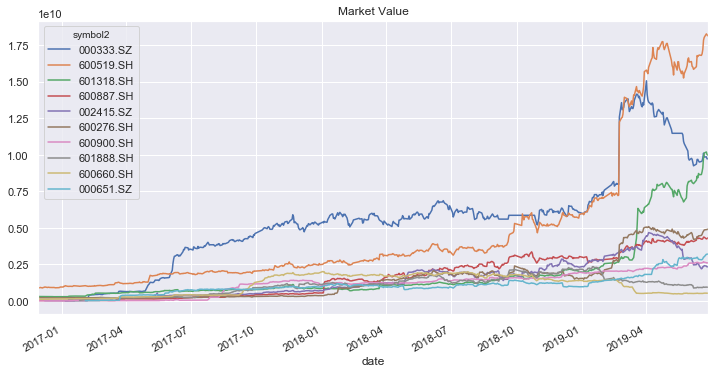

In [55]:
plot_market_value_top(21, 10)

28    JPMORGAN CHASE BANK, NATIONAL ASSOCIATION
Name: SHC_NAME, dtype: object


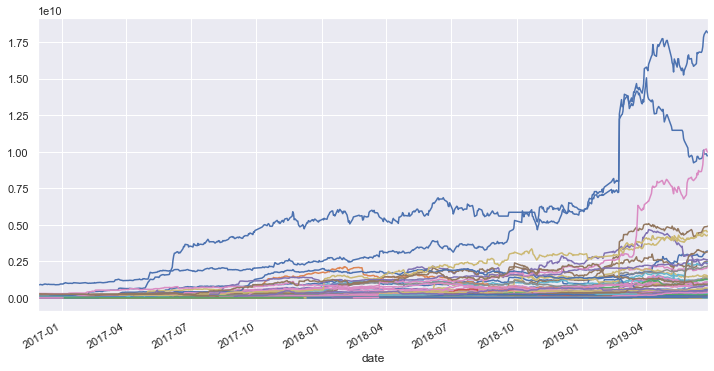

In [31]:
plot_market_value(21)

28    JPMORGAN CHASE BANK, NATIONAL ASSOCIATION
Name: SHC_NAME, dtype: object


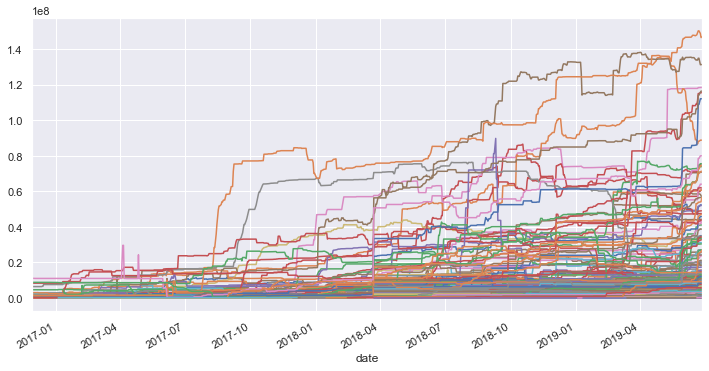

In [53]:
plot_holding(21)

### 主动择时+被动持有指数
- 各个股票持股数比率非常恒定
- 总持股数量从0到1mm不等，有主动择时

90    ABN AMRO CLEARING HONG KONG LTD
91    ABN AMRO CLEARING HONG KONG LTD
Name: SHC_NAME, dtype: object


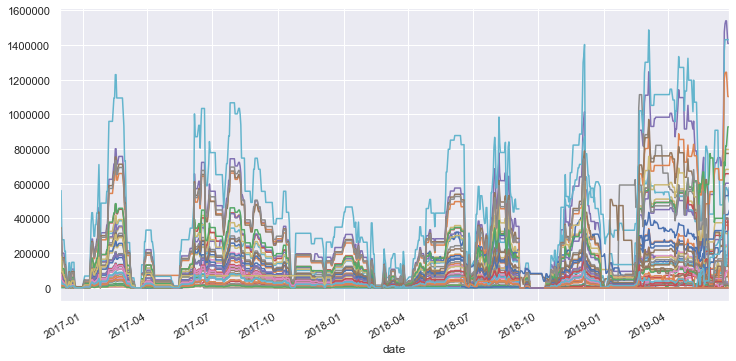

In [22]:
plot_holding(73)

### 被动持有指数（long only）
- 各个股票持股数比率比较恒定
- 受到特定事件的影响
    - 2018-06 骤然上升
    - 2019-06 骤然上升

27    渣打银行(香港)有限公司
Name: SHC_NAME, dtype: object


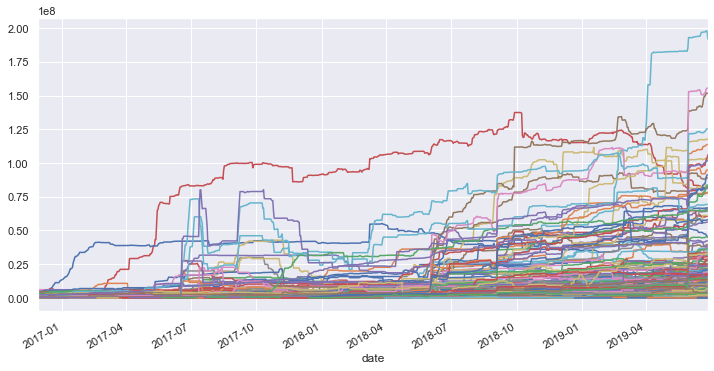

In [51]:
plot_holding(20)

27    渣打银行(香港)有限公司
Name: SHC_NAME, dtype: object


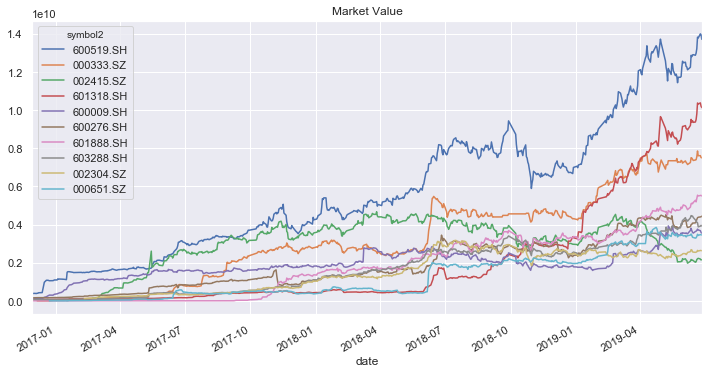

In [58]:
plot_market_value_top(20, 10)

HSBC也属于典型持有指数。由于其背后投资者较多，各个股票份额可能变化不一。

26    香港上海汇丰银行有限公司
Name: SHC_NAME, dtype: object


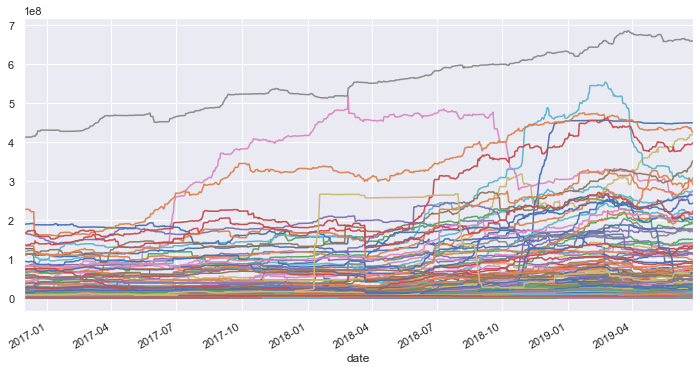

In [54]:
plot_holding(19)

26    香港上海汇丰银行有限公司
Name: SHC_NAME, dtype: object


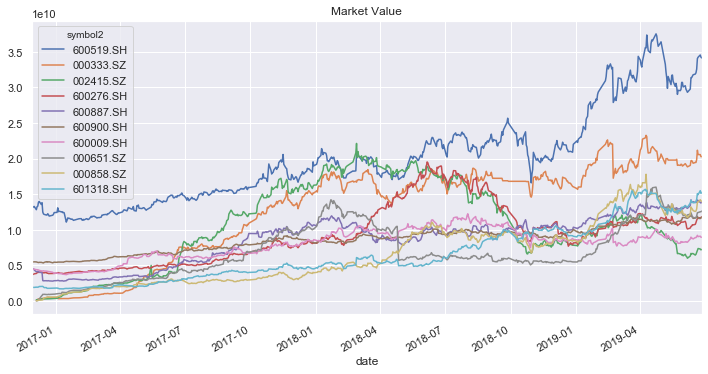

In [56]:
plot_market_value_top(19, 10)

26    香港上海汇丰银行有限公司
Name: SHC_NAME, dtype: object


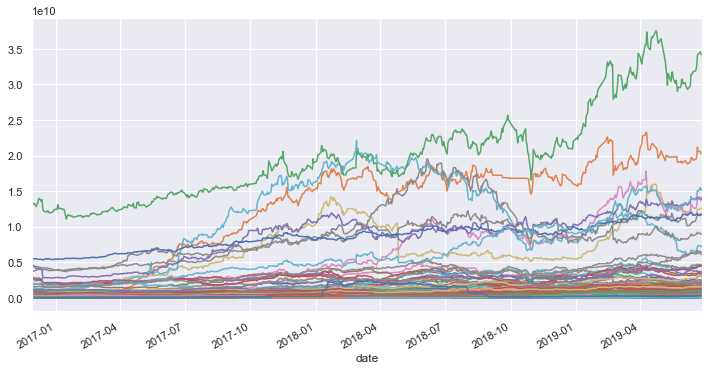

In [32]:
plot_market_value(19)

### 择时+选股（Quant Trading）
- 各个股票持股数比率经常变动
- 基本不受到MSCI纳入等事件的影响

31    UBS SECURITIES HONG KONG LTD
Name: SHC_NAME, dtype: object


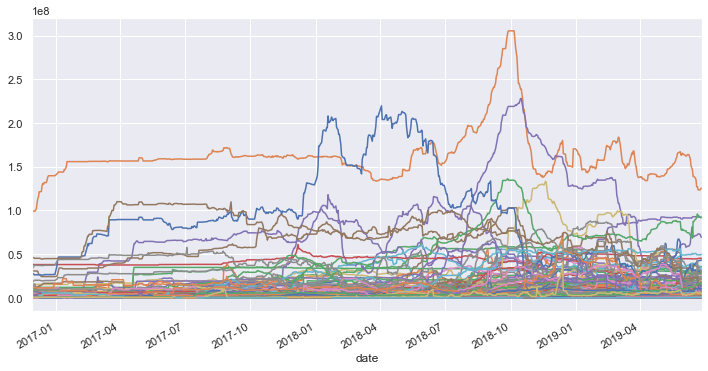

In [49]:
plot_holding(24)

31    UBS SECURITIES HONG KONG LTD
Name: SHC_NAME, dtype: object


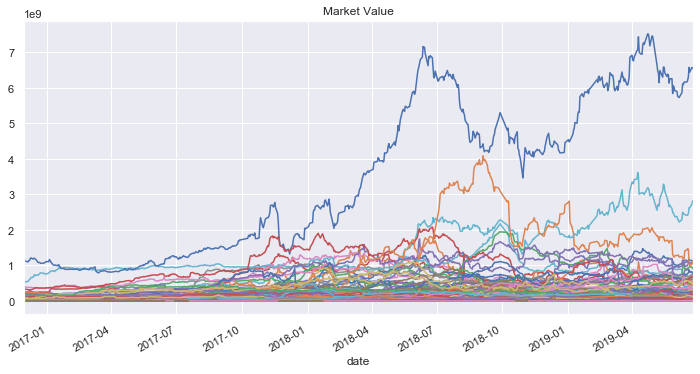

In [35]:
plot_market_value(24)

94    MORGAN STANLEY HONG KONG SECURITIES LTD
Name: SHC_NAME, dtype: object


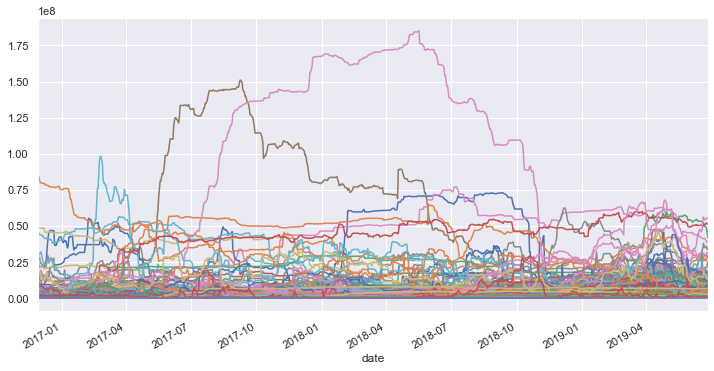

In [52]:
plot_holding(76)

94    MORGAN STANLEY HONG KONG SECURITIES LTD
Name: SHC_NAME, dtype: object


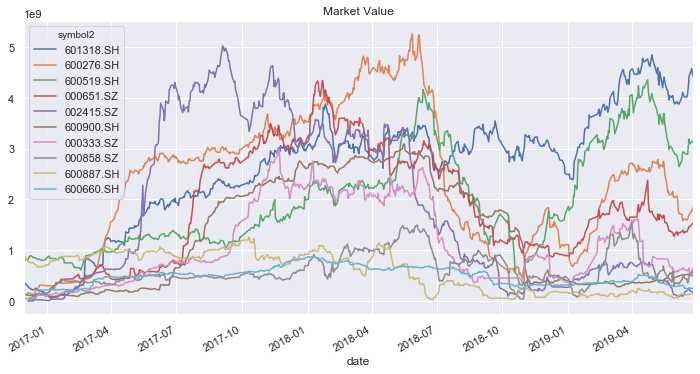

In [59]:
plot_market_value_top(76, 10)

116    CREDIT SUISSE SECURITIES (HONG KONG) LTD
Name: SHC_NAME, dtype: object


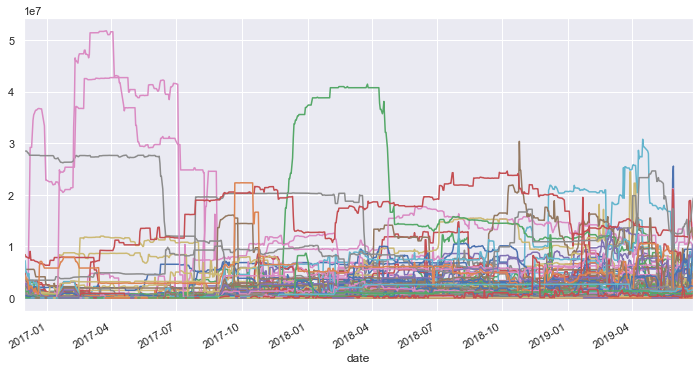

In [57]:
plot_holding(98)

116    CREDIT SUISSE SECURITIES (HONG KONG) LTD
Name: SHC_NAME, dtype: object


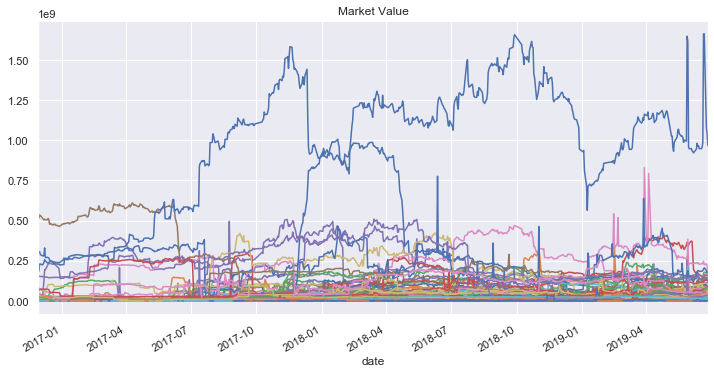

In [38]:
plot_market_value(98)

144    高盛(亚洲)证券有限公司
Name: SHC_NAME, dtype: object


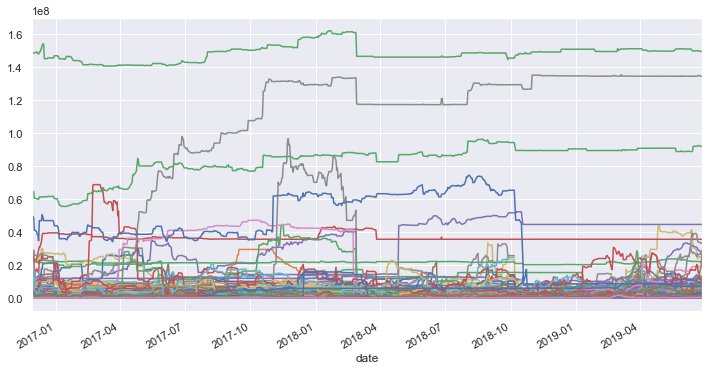

In [58]:
plot_holding(123)

144    高盛(亚洲)证券有限公司
Name: SHC_NAME, dtype: object


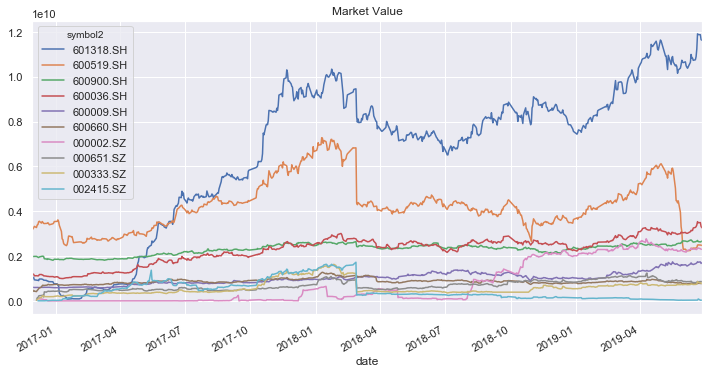

In [60]:
plot_market_value_top(123, 10)

## 沪港通重要事件
- 2018-04-11：沪港通每日额度扩大4倍
- 2018-05-31：226只A股股票被正式纳入MSCI新兴市场指数，纳入比例为2.5%
- 2018-08-31：新增10只A股成分股，同时，将纳入比例提升至5%。
- 2018-09-27：富时罗素（FTSERussell）宣布将A股纳入其全球股票指数体系，指数纳入将于2019年6月起生效